In [1]:
# Cell 1: Notebook Introduction (Markdown)

In [2]:
# Cell 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Cell 3: Load the Dataset
# Load data
df = pd.read_csv('../data/patient_readmission_risk.csv')

# Basic information
print("📊 Dataset Shape:", df.shape)
print("\n👀 First 5 rows:")
display(df.head())

print("\n📝 Column Names:")
print(df.columns.tolist())

📊 Dataset Shape: (2000, 33)

👀 First 5 rows:


,patient_id,age,gender,ethnicity,admission_type,admission_date,length_of_stay,num_previous_admissions,primary_diagnosis,secondary_diagnosis,...,alcohol_intake,physical_activity_level,diet_quality,living_alone,treatment_type,discharge_disposition,followup_appointment_scheduled,followup_days,high_risk_readmission,discharge_date
0,1001,71,Male,African American,Urgent,21/01/2024,1,3,Heart Failure,NaN,...,Moderate,Low,Good,0,Medication,Home,0,1,1,22/01/2024
1,1002,34,Male,African American,Emergency,09/04/2024,7,0,Heart Failure,Obesity,...,High,Low,Poor,0,Medication,Nursing Home,0,37,0,16/04/2024
2,1003,80,Female,Hispanic,Emergency,26/10/2024,10,4,COPD,Kidney Disease,...,Moderate,High,Good,1,Medication,Nursing Home,1,20,1,05/11/2024
3,1004,40,Male,Hispanic,Elective,12/04/2024,4,0,Diabetes,Hypertension,...,Moderate,High,Good,0,Medication,Nursing Home,0,0,0,16/04/2024
4,1005,43,Female,Asian,Emergency,16/02/2024,7,3,COPD,Hypertension,...,NaN,Low,Poor,1,Surgery,Home,1,29,0,23/02/2024



📝 Column Names:
['patient_id', 'age', 'gender', 'ethnicity', 'admission_type', 'admission_date', 'length_of_stay', 'num_previous_admissions', 'primary_diagnosis', 'secondary_diagnosis', 'num_lab_procedures', 'num_medications', 'num_outpatient_visits', 'num_emergency_visits', 'num_inpatient_visits', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'bmi', 'glucose_level', 'cholesterol_level', 'heart_rate', 'oxygen_saturation', 'smoking_status', 'alcohol_intake', 'physical_activity_level', 'diet_quality', 'living_alone', 'treatment_type', 'discharge_disposition', 'followup_appointment_scheduled', 'followup_days', 'high_risk_readmission', 'discharge_date']


In [4]:
# Cell 4: Data Overview & Metadata
print("🔍 Dataset Info:")
print(df.info())

print("\n📈 Descriptive Statistics:")
display(df.describe())

print("\n🎯 Target Variable Distribution:")
print(df['high_risk_readmission'].value_counts())
print("Percentage:")
print(df['high_risk_readmission'].value_counts(normalize=True) * 100)

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      2000 non-null   int64  
 1   age                             2000 non-null   int64  
 2   gender                          2000 non-null   object 
 3   ethnicity                       2000 non-null   object 
 4   admission_type                  2000 non-null   object 
 5   admission_date                  2000 non-null   object 
 6   length_of_stay                  2000 non-null   int64  
 7   num_previous_admissions         2000 non-null   int64  
 8   primary_diagnosis               2000 non-null   object 
 9   secondary_diagnosis             1593 non-null   object 
 10  num_lab_procedures              2000 non-null   int64  
 11  num_medications                 2000 non-null   int64  
 12  num_outpatient_vis

,patient_id,age,length_of_stay,num_previous_admissions,num_lab_procedures,num_medications,num_outpatient_visits,num_emergency_visits,num_inpatient_visits,blood_pressure_systolic,blood_pressure_diastolic,bmi,glucose_level,cholesterol_level,heart_rate,oxygen_saturation,living_alone,followup_appointment_scheduled,followup_days,high_risk_readmission
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2000.500000,53.851500,7.502000,2.03450,55.313000,9.865000,4.451500,2.090500,2.059000,139.575500,84.959500,29.186650,161.855000,210.675650,89.567500,94.998250,0.491500,0.496000,29.094000,0.474000
std,577.494589,20.305778,4.010242,1.41715,25.935253,5.537247,2.897559,1.410782,1.412628,23.074239,14.684437,6.472528,51.291188,51.063727,17.516874,2.879996,0.500053,0.500109,17.474806,0.499448
min,1001.000000,20.000000,1.000000,0.00000,10.000000,1.000000,0.000000,0.000000,0.000000,100.000000,60.000000,18.000000,70.000000,120.200000,60.000000,90.000000,0.000000,0.000000,0.000000,0.000000
25%,1500.750000,36.000000,4.000000,1.00000,33.000000,5.000000,2.000000,1.000000,1.000000,120.000000,72.000000,23.700000,117.875000,168.000000,74.000000,92.500000,0.000000,0.000000,14.000000,0.000000
50%,2000.500000,54.000000,8.000000,2.00000,56.000000,10.000000,4.000000,2.000000,2.000000,139.000000,85.000000,29.300000,164.000000,210.200000,89.000000,95.000000,0.000000,0.000000,29.000000,0.000000
75%,2500.250000,71.000000,11.000000,3.00000,78.000000,15.000000,7.000000,3.000000,3.000000,160.000000,98.000000,34.825000,205.025000,254.325000,105.000000,97.400000,1.000000,1.000000,44.000000,1.000000
max,3000.000000,89.000000,14.000000,4.00000,99.000000,19.000000,9.000000,4.000000,4.000000,179.000000,109.000000,40.000000,249.900000,300.000000,119.000000,100.000000,1.000000,1.000000,59.000000,1.000000



🎯 Target Variable Distribution:
high_risk_readmission
0    1052
1     948
Name: count, dtype: int64
Percentage:
high_risk_readmission
0    52.6
1    47.4
Name: proportion, dtype: float64


In [5]:
# Cell 5: Check for Missing Data
print("🔎 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if missing_df.empty:
    print("✅ No missing values found!")
else:
    display(missing_df)

🔎 Missing Values Analysis:


,Missing Count,Missing Percentage
secondary_diagnosis,407,20.35
alcohol_intake,650,32.50


In [6]:
# Cell 6: Check Data Types and Unique Values
print("📊 Data Types:")
print(df.dtypes)

print("\n🎯 Unique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())

📊 Data Types:
patient_id                          int64
age                                 int64
gender                             object
ethnicity                          object
admission_type                     object
admission_date                     object
length_of_stay                      int64
num_previous_admissions             int64
primary_diagnosis                  object
secondary_diagnosis                object
num_lab_procedures                  int64
num_medications                     int64
num_outpatient_visits               int64
num_emergency_visits                int64
num_inpatient_visits                int64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
bmi                               float64
glucose_level                     float64
cholesterol_level                 float64
heart_rate                          int64
oxygen_saturation                 float64
smoking_status                     object
alcohol_intake      

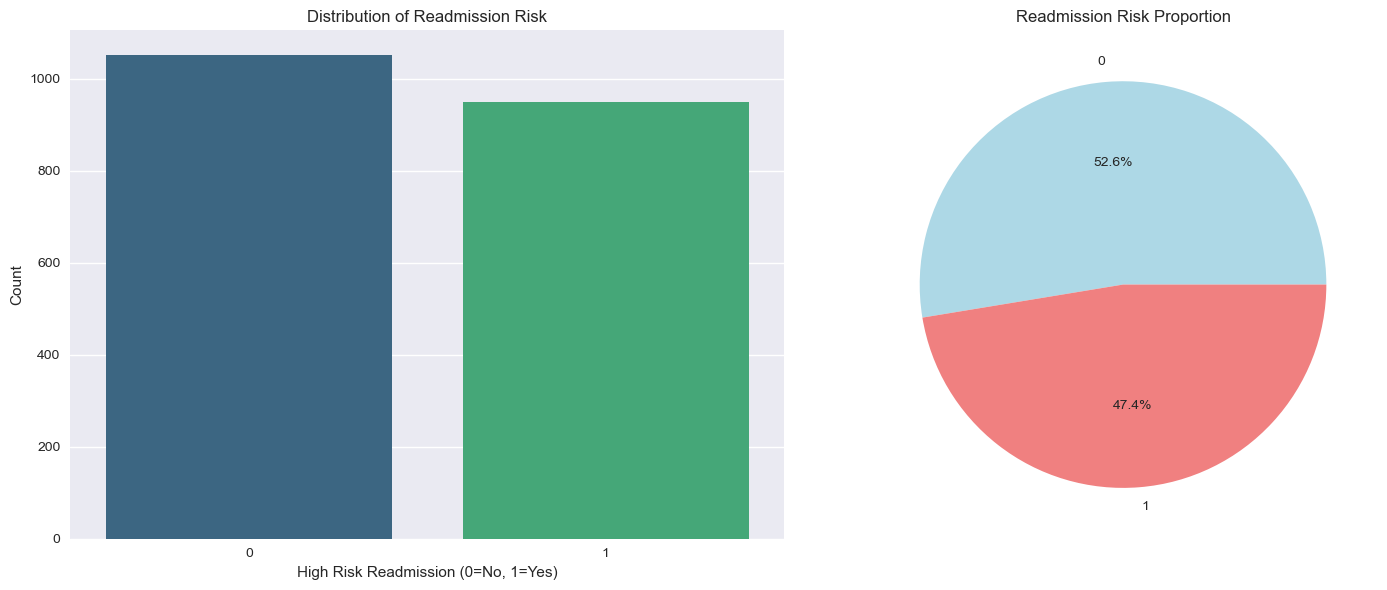

Class Distribution: {0: np.int64(1052), 1: np.int64(948)}
Class Balance Ratio: 1.11:1


In [7]:
# Cell 7: Explore Target Variable Distribution
# Target variable visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='high_risk_readmission', ax=ax1, palette='viridis')
ax1.set_title('Distribution of Readmission Risk')
ax1.set_xlabel('High Risk Readmission (0=No, 1=Yes)')
ax1.set_ylabel('Count')

# Pie chart
target_counts = df['high_risk_readmission'].value_counts()
ax2.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'])
ax2.set_title('Readmission Risk Proportion')

plt.tight_layout()
plt.show()

print(f"Class Distribution: {dict(target_counts)}")
print(f"Class Balance Ratio: {target_counts[0]/target_counts[1]:.2f}:1")

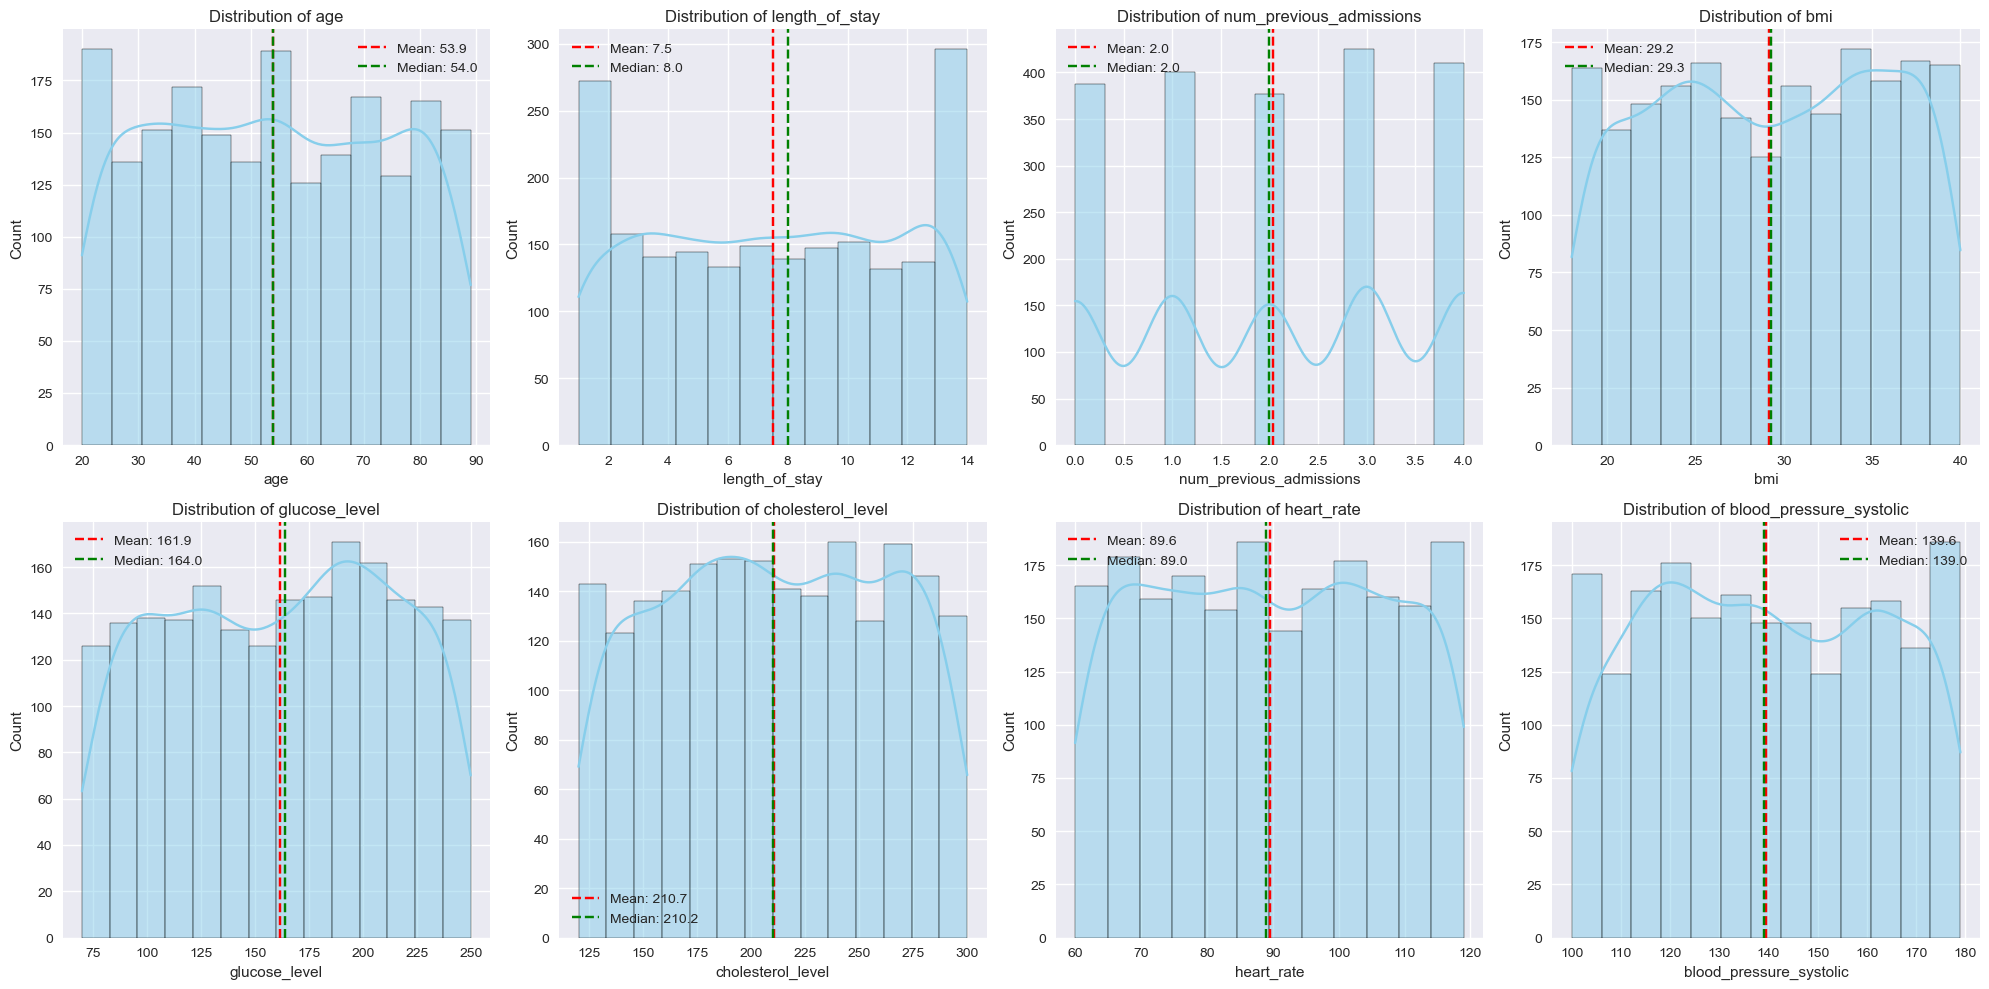

In [8]:
# Cell 8: Univariate Analysis - Numerical Features
# Select key numerical features for analysis
numerical_features = ['age', 'length_of_stay', 'num_previous_admissions', 
                     'bmi', 'glucose_level', 'cholesterol_level', 
                     'heart_rate', 'blood_pressure_systolic']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

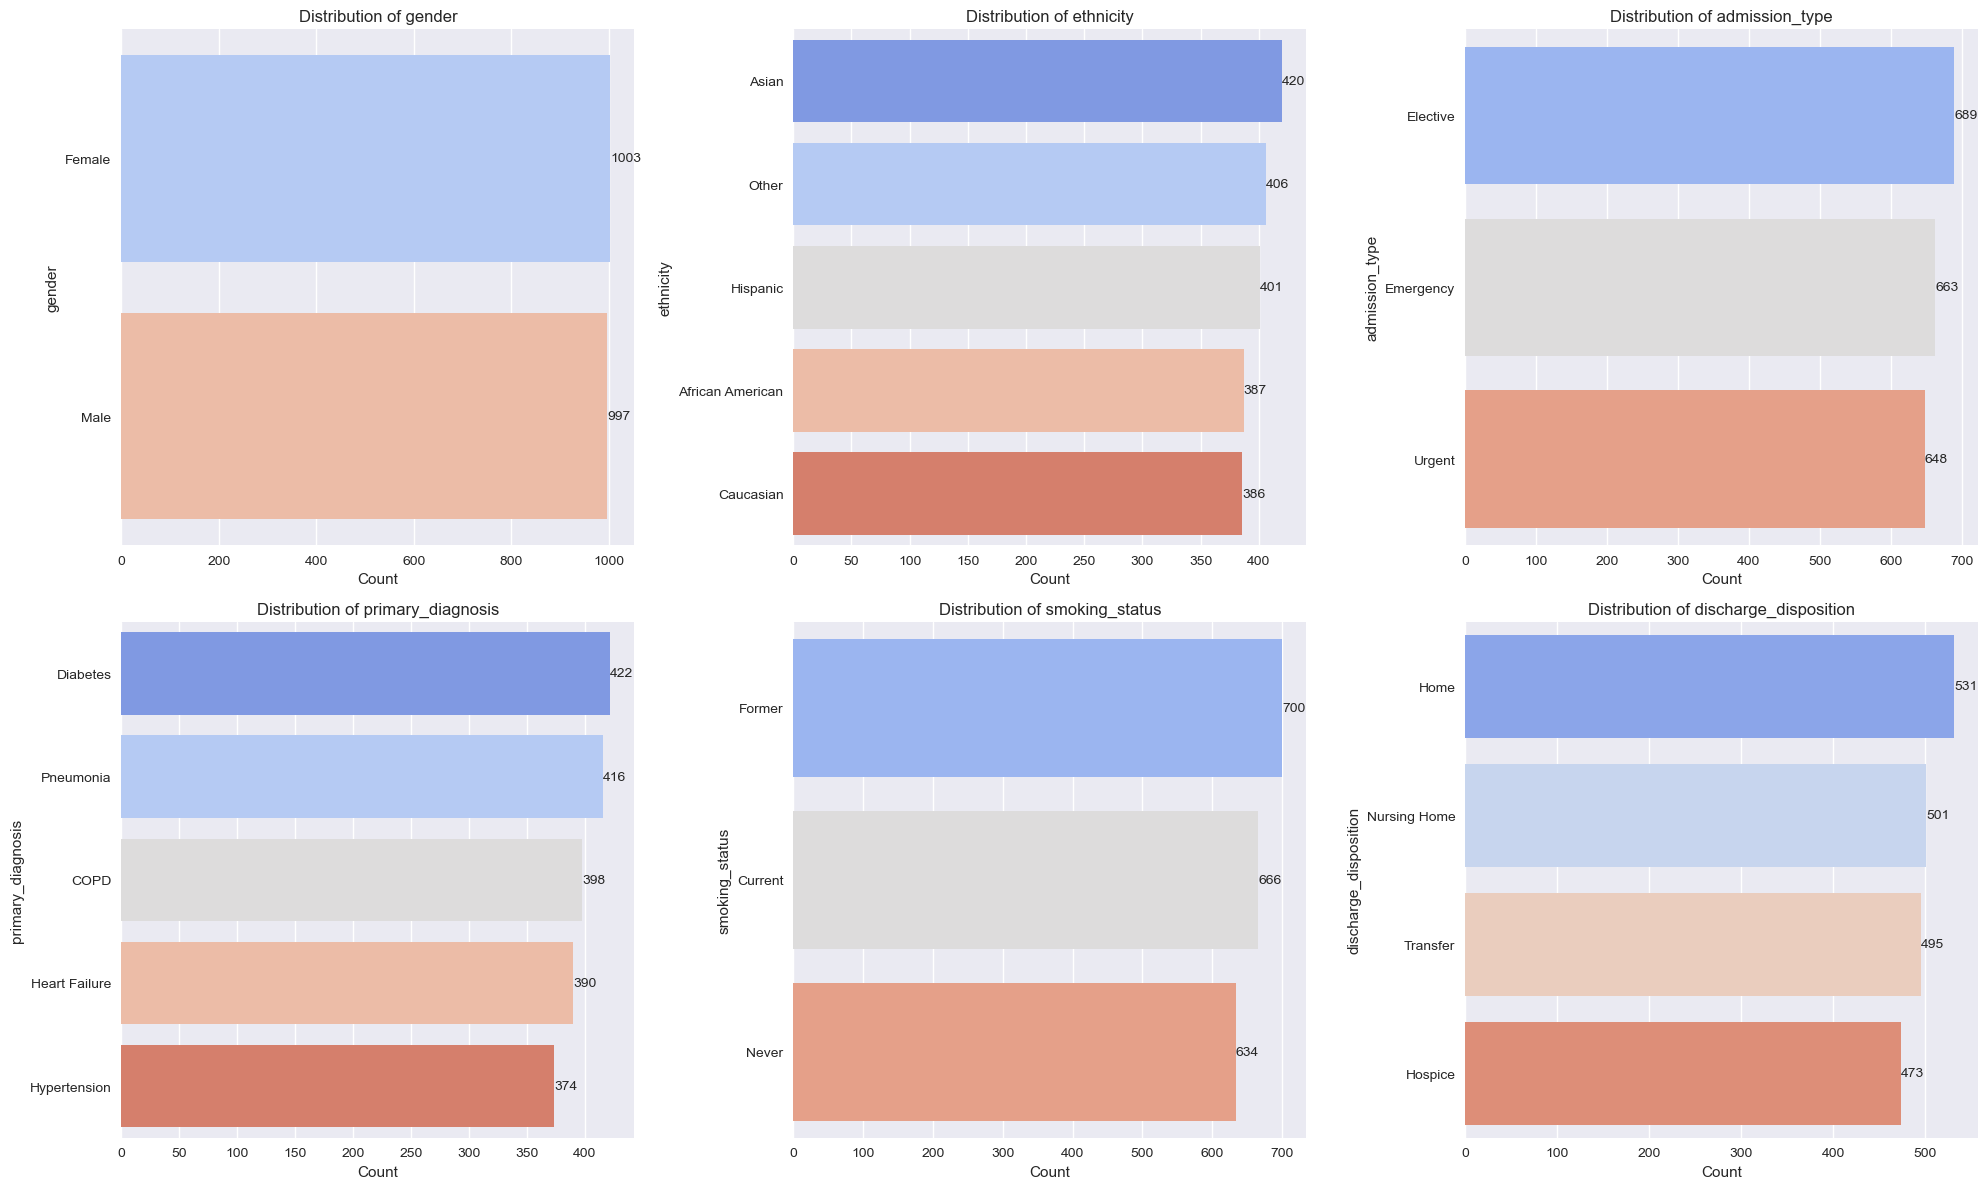

In [9]:
# Cell 9: Univariate Analysis - Categorical Features
categorical_features = ['gender', 'ethnicity', 'admission_type', 'primary_diagnosis', 
                       'smoking_status', 'discharge_disposition']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Get value counts and plot
    value_counts = df[feature].value_counts()
    
    # For features with many categories, show top 10
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
        
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Count')
    
    # Add count labels on bars
    for j, v in enumerate(value_counts.values):
        axes[i].text(v + 0.1, j, str(v), va='center')

plt.tight_layout()
plt.show()

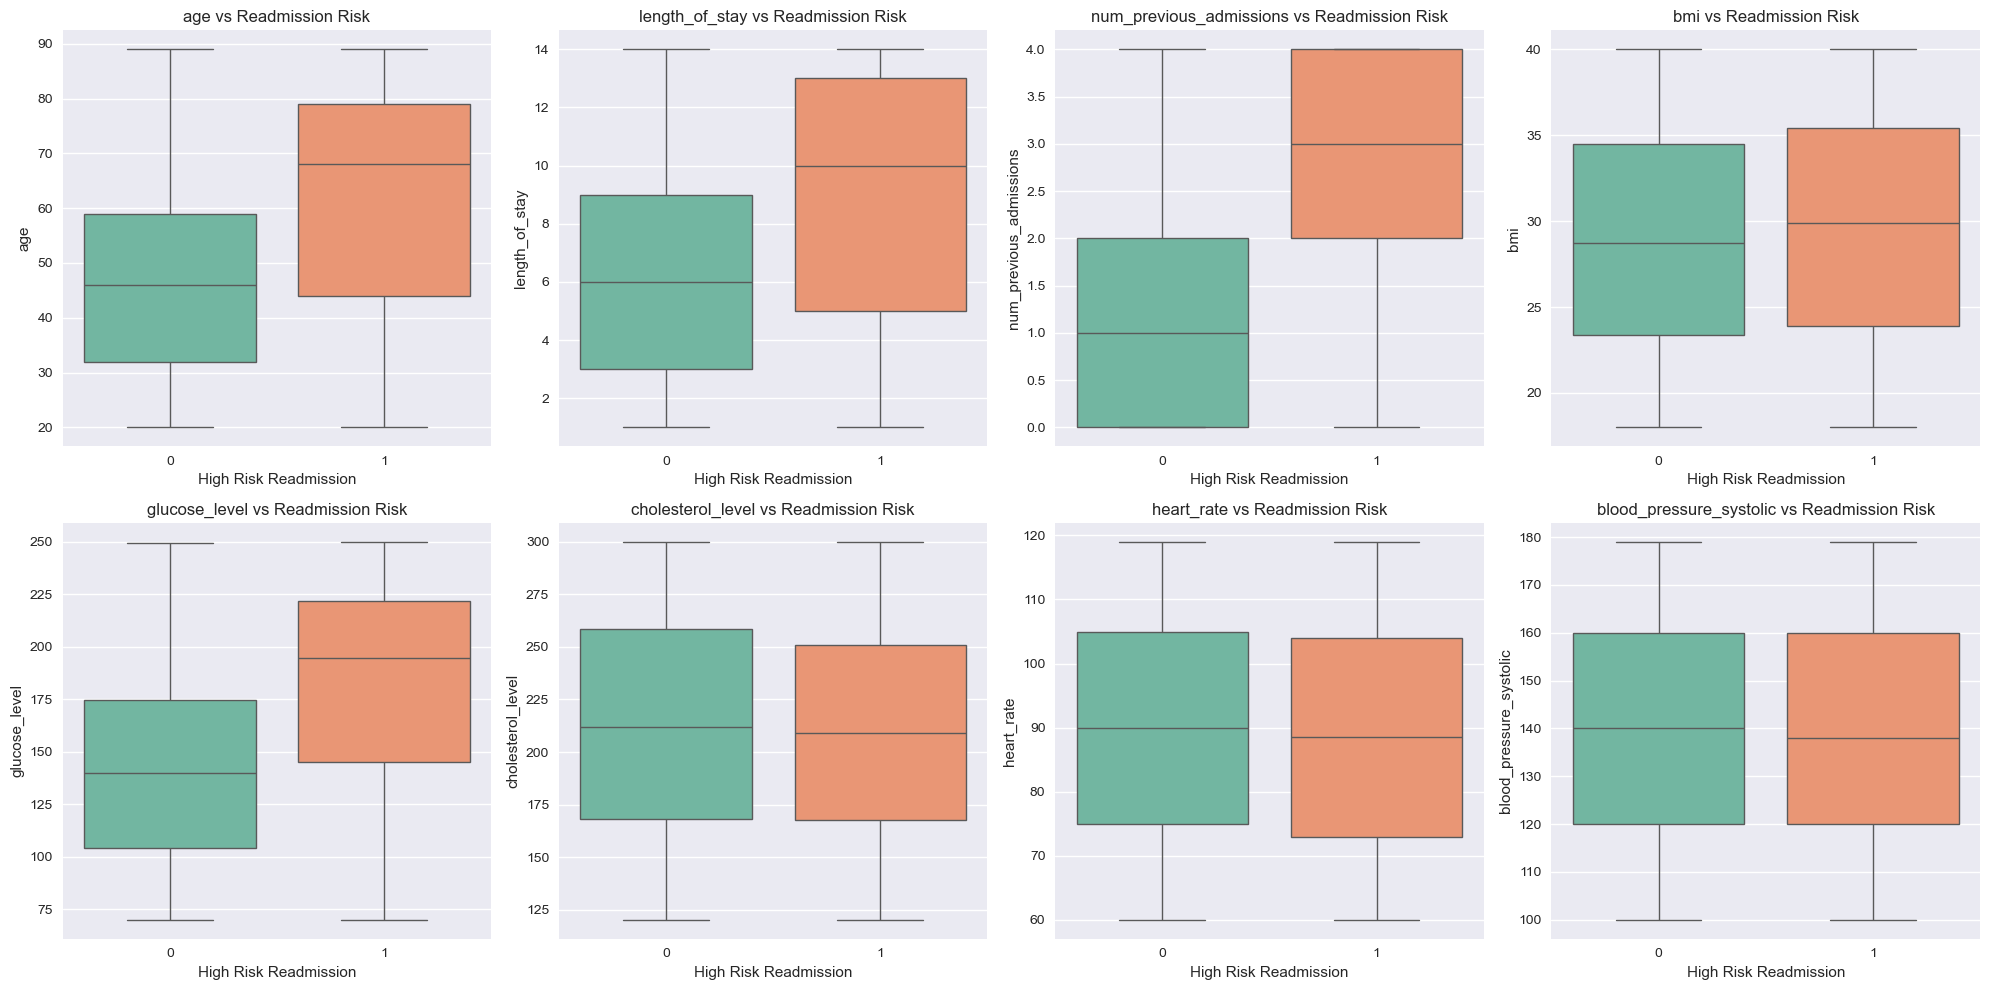

In [10]:
# Cell 10: Bivariate Analysis - Numerical Features vs Target
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='high_risk_readmission', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs Readmission Risk')
    axes[i].set_xlabel('High Risk Readmission')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

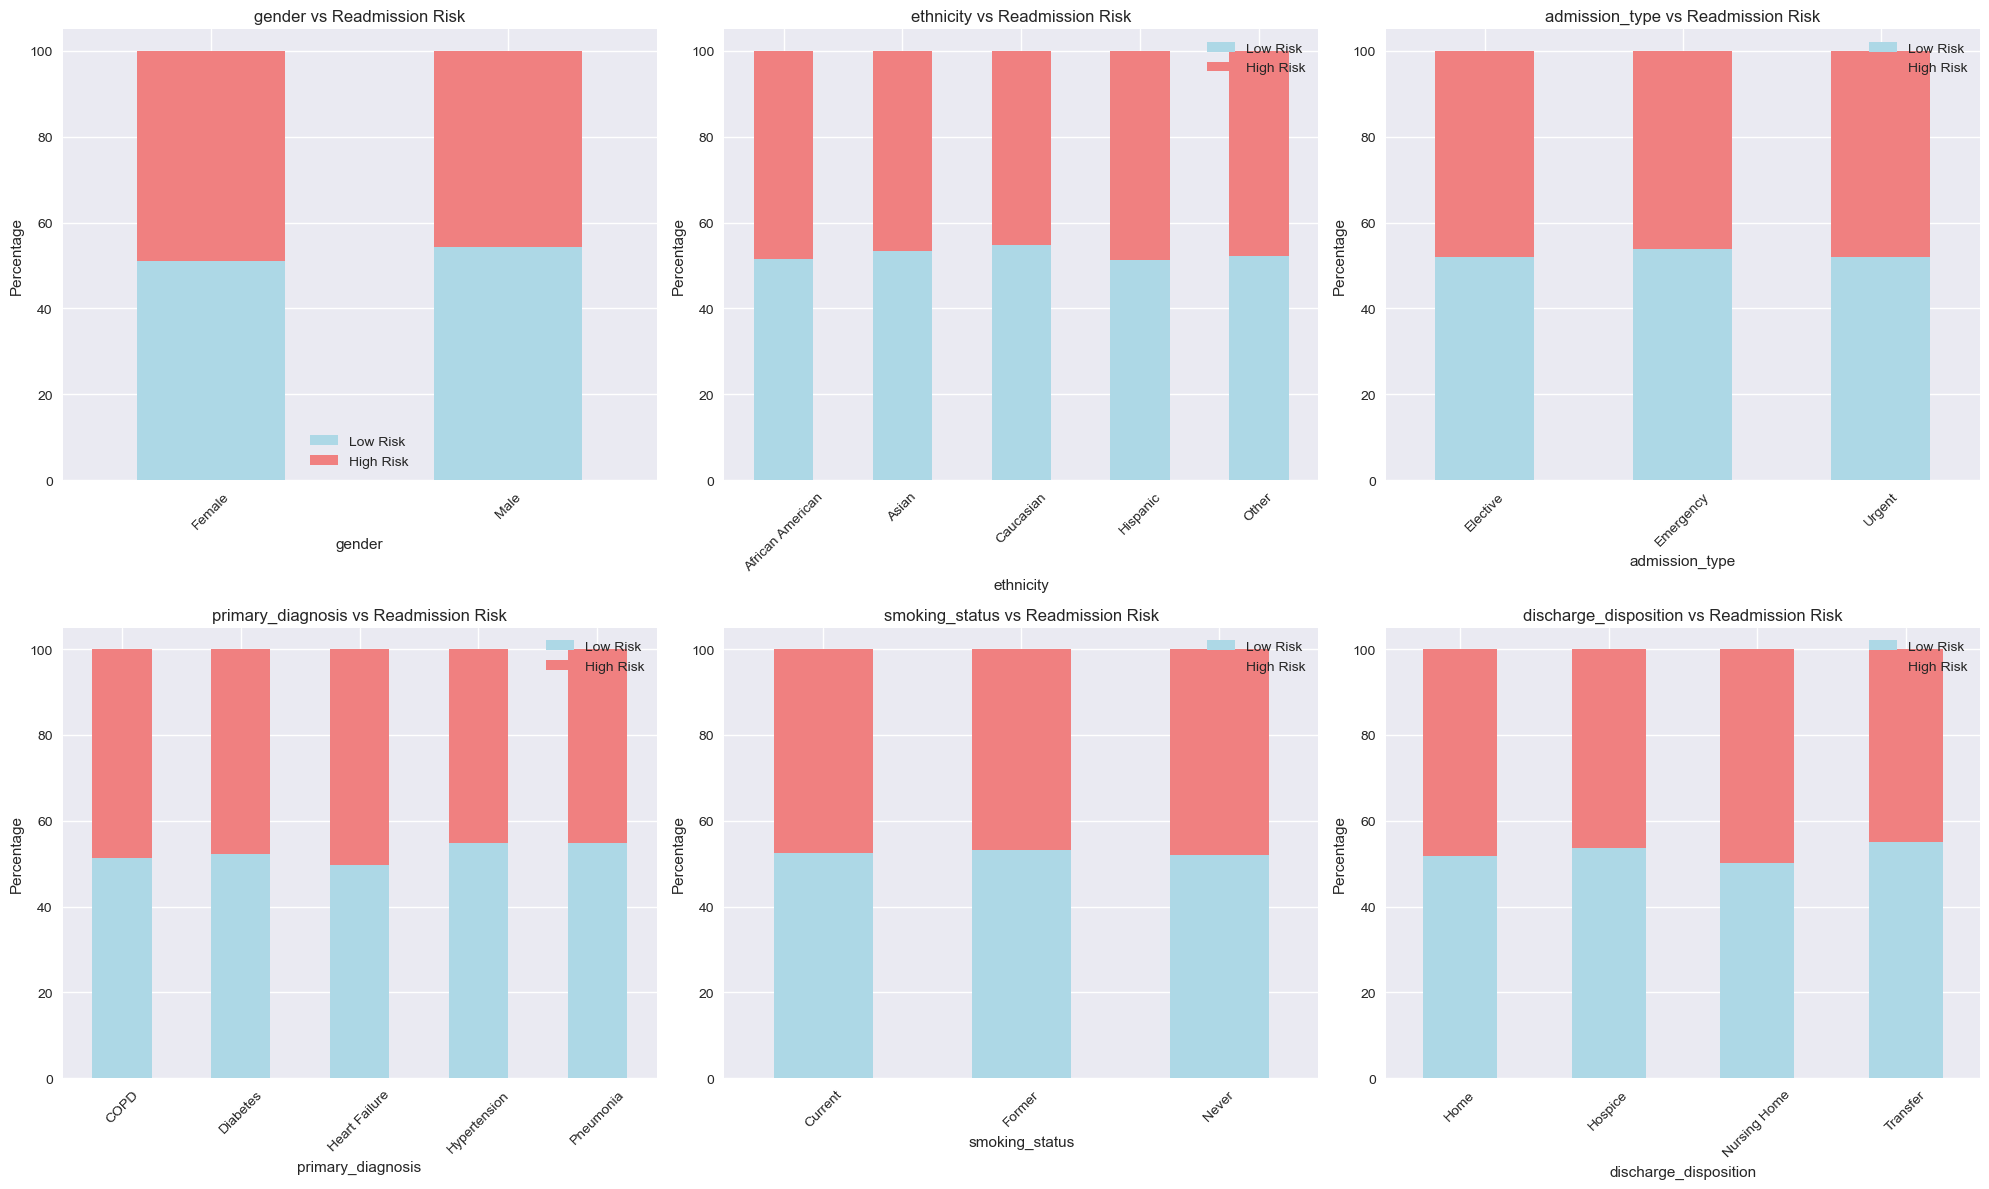

In [11]:
# Cell 11: Bivariate Analysis - Categorical Features vs Target
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Create cross tabulation
    cross_tab = pd.crosstab(df[feature], df['high_risk_readmission'], normalize='index') * 100
    
    # Plot stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], 
                  color=['lightblue', 'lightcoral'])
    axes[i].set_title(f'{feature} vs Readmission Risk')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['Low Risk', 'High Risk'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

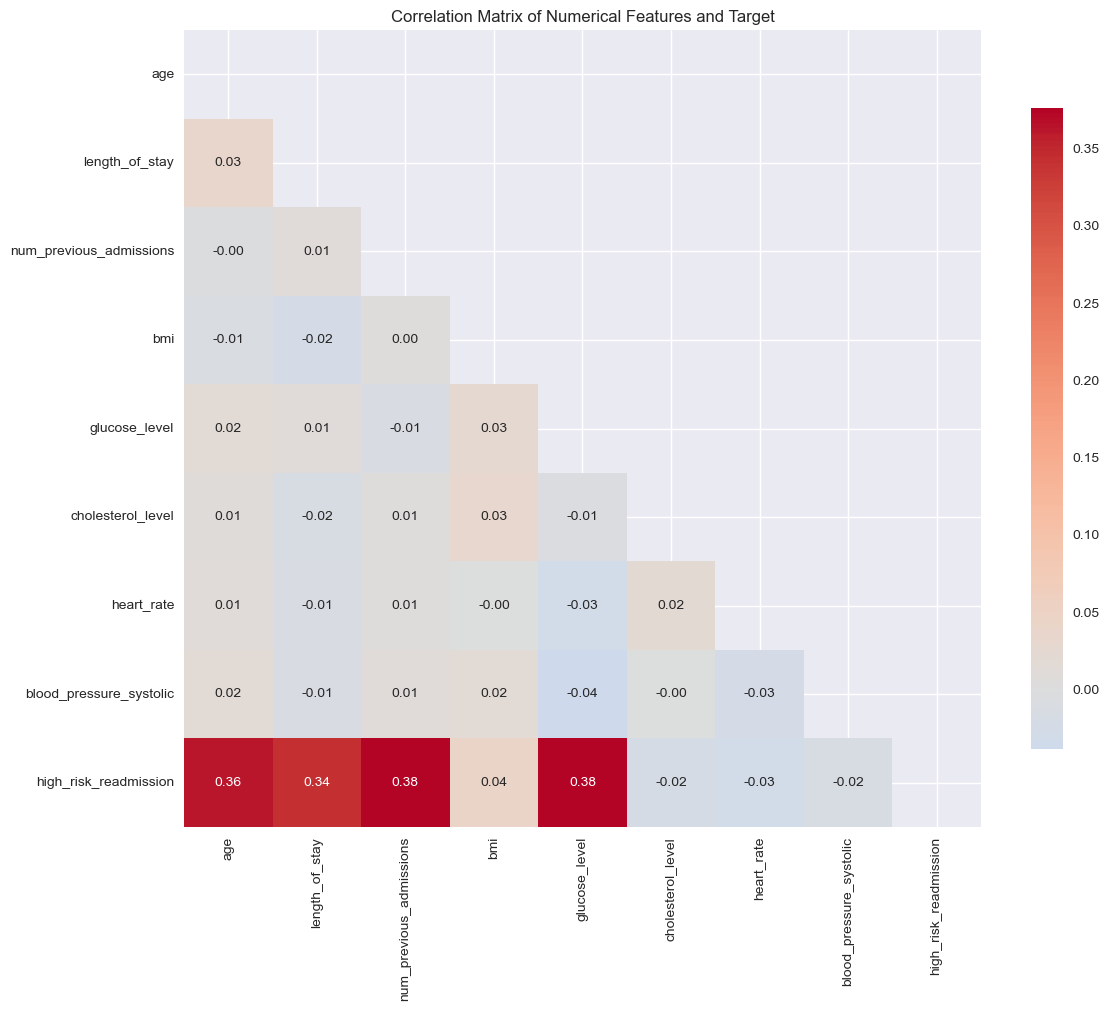

🔗 Top correlations with readmission risk:


high_risk_readmission      1.000000
num_previous_admissions    0.376212
glucose_level              0.375685
age                        0.362289
length_of_stay             0.341450
bmi                        0.042843
blood_pressure_systolic   -0.017128
cholesterol_level         -0.021992
heart_rate                -0.029447
Name: high_risk_readmission, dtype: float64

In [12]:
# Cell 12: Correlation Analysis
# Select numerical features for correlation
correlation_features = numerical_features + ['high_risk_readmission']
corr_matrix = df[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features and Target')
plt.tight_layout()
plt.show()

# Top correlations with target
target_correlations = corr_matrix['high_risk_readmission'].sort_values(ascending=False)
print("🔗 Top correlations with readmission risk:")
display(target_correlations)

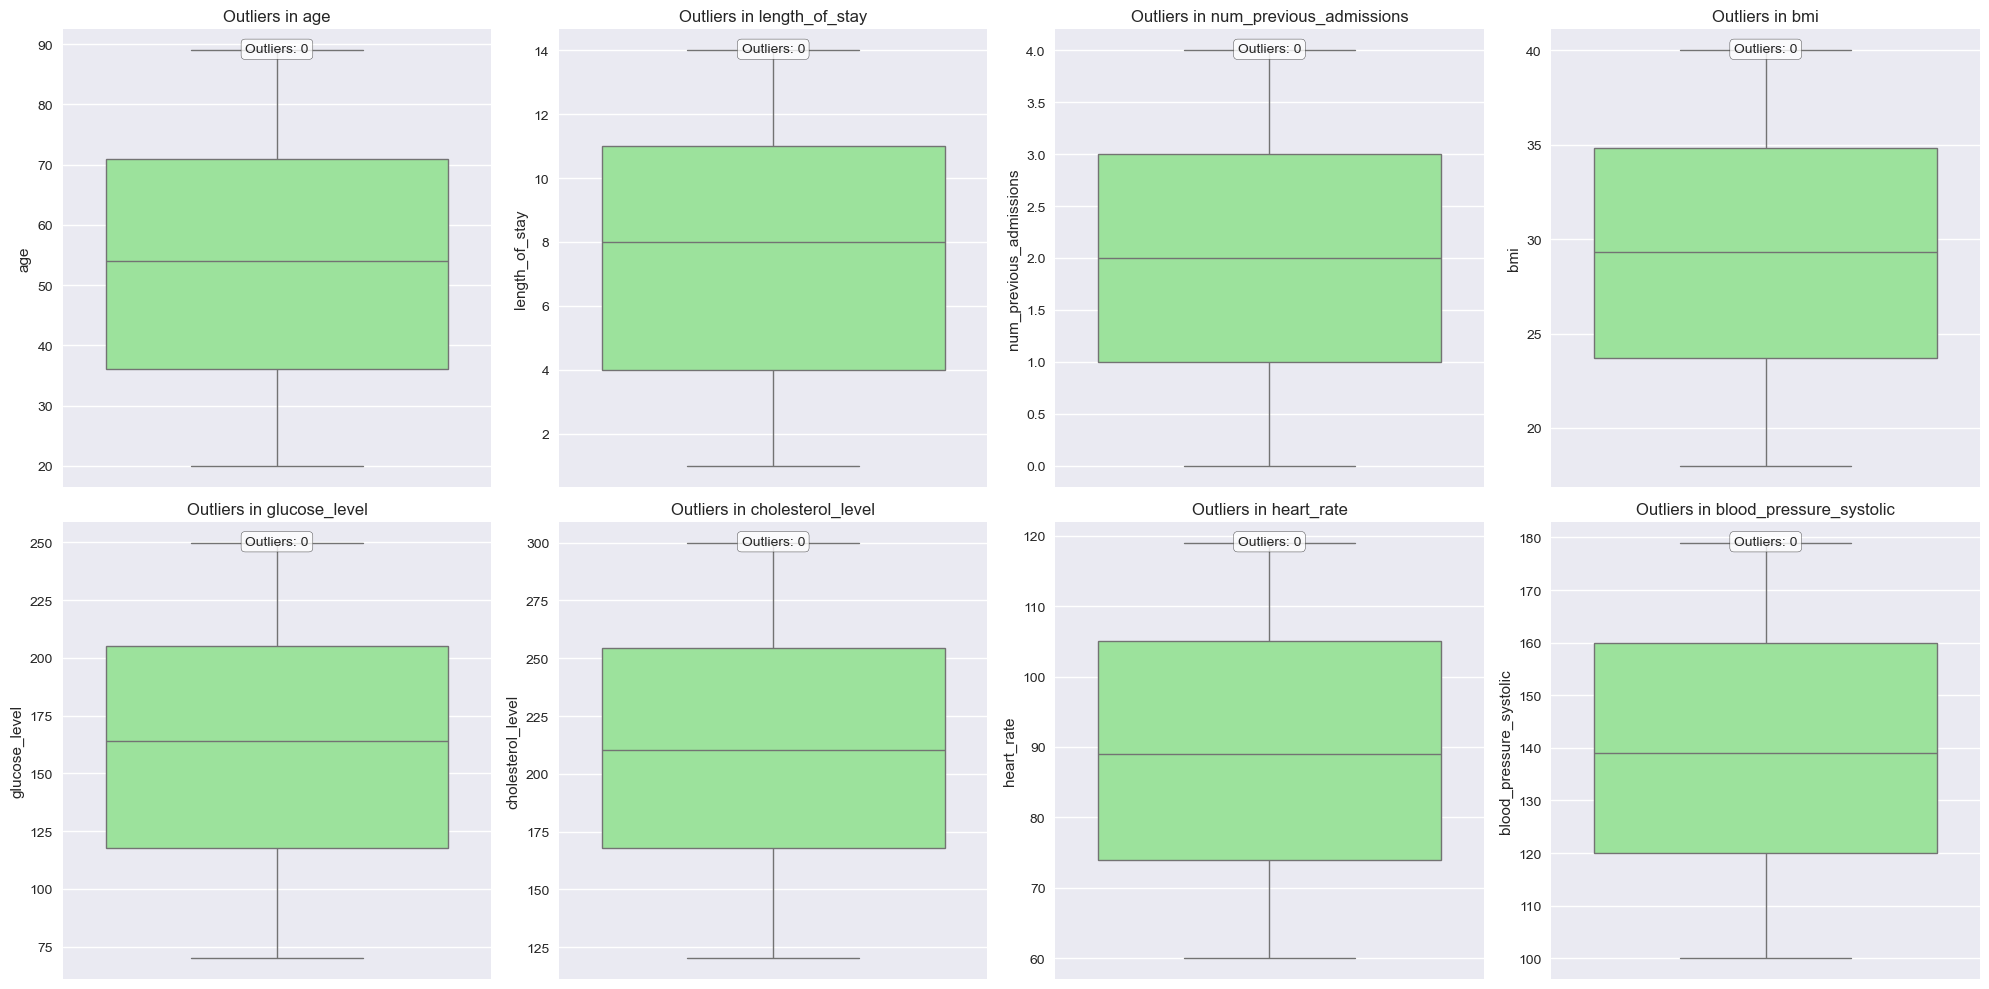

In [13]:
# Cell 13: Outlier Detection
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Outliers in {feature}')
    
    # Calculate outliers using IQR method
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)}', 
                transform=axes[i].transAxes, ha='center', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [14]:
# Cell 14: Feature Engineering Preparation
# Identify feature types
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from numerical features
numerical_features.remove('high_risk_readmission')

print("📊 Feature Types Summary:")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Target Variable: high_risk_readmission")

# Check for high cardinality categorical features
print("\n🔍 High Cardinality Check:")
for feature in categorical_features:
    unique_count = df[feature].nunique()
    if unique_count > 20:
        print(f"⚠️  {feature}: {unique_count} unique values (High Cardinality)")

📊 Feature Types Summary:
Categorical Features (13): ['gender', 'ethnicity', 'admission_type', 'admission_date', 'primary_diagnosis', 'secondary_diagnosis', 'smoking_status', 'alcohol_intake', 'physical_activity_level', 'diet_quality', 'treatment_type', 'discharge_disposition', 'discharge_date']
Numerical Features (19): ['patient_id', 'age', 'length_of_stay', 'num_previous_admissions', 'num_lab_procedures', 'num_medications', 'num_outpatient_visits', 'num_emergency_visits', 'num_inpatient_visits', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'bmi', 'glucose_level', 'cholesterol_level', 'heart_rate', 'oxygen_saturation', 'living_alone', 'followup_appointment_scheduled', 'followup_days']
Target Variable: high_risk_readmission

🔍 High Cardinality Check:
⚠️  admission_date: 299 unique values (High Cardinality)
⚠️  discharge_date: 306 unique values (High Cardinality)


In [15]:
# Cell 15: Data Quality Assessment Summary
print("📋 DATA QUALITY ASSESSMENT SUMMARY")
print("="*50)

# Basic stats
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Data types summary
print(f"\n📊 Data Types:")
print(df.dtypes.value_counts())

# Target balance
target_balance = df['high_risk_readmission'].value_counts(normalize=True)
print(f"\n🎯 Target Balance: {target_balance[0]:.1%} vs {target_balance[1]:.1%}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicates}")

# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"📏 Constant Columns: {constant_cols if constant_cols else 'None'}")

📋 DATA QUALITY ASSESSMENT SUMMARY
Total Records: 2,000
Total Features: 33
Memory Usage: 1.7 MB

📊 Data Types:
int64      16
object     13
float64     4
Name: count, dtype: int64

🎯 Target Balance: 52.6% vs 47.4%

🔍 Duplicate Rows: 0
📏 Constant Columns: None


In [16]:
# Export Clean Dataset
# Create a copy for cleaning (minimal changes needed based on EDA)
df_clean = df.copy()

# Basic cleaning steps based on EDA findings
print("🧹 Performing basic data cleaning...")

# Convert date columns to datetime (if they exist)
date_columns = ['admission_date', 'discharge_date']
for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y')
        print(f"✅ Converted {col} to datetime")

# Save cleaned dataset
clean_file_path = '../data/patient_readmission_risk_clean.csv'
df_clean.to_csv(clean_file_path, index=False)
print(f"✅ Clean dataset saved to: {clean_file_path}")
print(f"📁 Clean dataset shape: {df_clean.shape}")

🧹 Performing basic data cleaning...
✅ Converted admission_date to datetime
✅ Converted discharge_date to datetime
✅ Clean dataset saved to: ../data/patient_readmission_risk_clean.csv
📁 Clean dataset shape: (2000, 33)
